<a href="https://colab.research.google.com/github/YaCpotato/python_tutorial_reading_session/blob/master/LinearProgrammingPPM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 数理計画法

## **1. 線形計画法**

## **1.1 生産計画問題**

製品１、２を限られた資源で、最大限利益がでるように生産計画を立てる問題  
以下に、製品ごとの必要な３種類の原料の使用料と利益。それぞれの原料には使用制限がある

---

||原料１（トン）|原料２（トン）|原料３（トン）|利益（万円）|
|:--:|:--:|:--:|:--:|:--:|
|製品１|1|4|3|5|
|製品2|2|4|1|4|
|使用可能量|80|180|90||

### **1.1.1 目的関数の定義**
製品１の数を$x_1$、製品２の数を$x_2$とすると、最大化すべき利益（目的関数）は

$$5x_1 + 4x_2...①$$

とおける

### **1.1.2 制約式の追加**
原料1の使用料は、製品1、2でそれぞれ1トン、2トンごとである。それぞれの個数を掛けて足した数は80以下でなければならないので
$$x_1 + 2x_2 \leq 80 ...②$$

原料2の使用料は、製品1、2でそれぞれ4トンである。それぞれの個数を掛けて足した数は180以下でなければならないので
$$4x_1 + 4x_2 \leq 180 ...③$$

原料3の使用料は、製品1、2でそれぞれ3トン、1トンである。それぞれの個数を掛けて足した数は90以下でなければならないので
$$3x_1 + x_2 \leq 90 ...④$$

製品の生産数というのは、負の数を取らないので、グラフ上の第一象限に位置していなければならないので
$$x_1 \geqq 0, x_2 \geqq 0...⑤ $$

- 第一象限：$x_1 > 0, x_2 > 0$
- 第二象限：$x_1 > 0, x_2 < 0$
- 第三象限：$x_1 < 0, x_2 < 0$
- 第四象限：$x_1 < 0, x_2 > 0$

↓第一象限は以下のエリアのこと

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


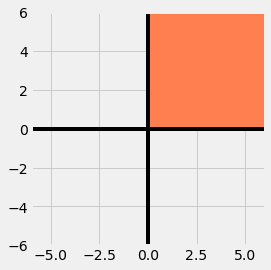

In [54]:
graph = plt.subplot()
x = range(-10,10)
y = range(-10,10)
zero = [0] * 20
graph.plot(zero, y, color="black")
graph.plot(x, zero, color="black")

graph.set_xlim([-6,6])
graph.set_ylim([-6,6])
graph.set_aspect('equal')
graph.axvspan(0, 6, 0.5, color = "coral")
plt.show()

式①〜⑤を線形計画法的に書くと

$$
max. 5x_1 + 4x_2　\\
s.t. \quad x_1 + 2x_2 \leq 80 \\
\quad \quad 4x_1 + 4x_2 \leq 180 \\
\quad \quad 3x_1 + x_2 \leq 90 \\
\quad \quad x_1 \geqq 0, x_2 \geqq 0 \\
$$

---

となる

### **1.1.3 グラフ化により最大の値の交点を成す直線に目星をつける**

グラフによる視覚化で、最大となる交点を成す2直線が$s.t.$(subject to)の中にある。直線といえど交点までは見抜けないので、おとなしくグラフ化しよう。 
ここでは高校数学Ⅱの「軌跡と領域：不等式の領域」の知識が必要となる。不安な人は[受験の月](https://examist.jp/mathematics/locus-area/futousiki-area/)でも見よう

それぞれをグラフ化するとこうなる

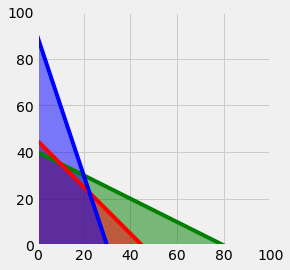

In [55]:
import numpy as np

graph = plt.subplot()
x = np.arange(0, 180, 1.0)
s_t_one = (-0.5 * x) + 40
s_t_two = (-1 * x) + 45
s_t_three = (-3 * x) + 90
graph.plot(x, s_t_one, color="green")
graph.fill_between(x, s_t_one, facecolor='green', alpha=0.5)
graph.plot(x, s_t_two, color="red")
graph.fill_between(x, s_t_two, facecolor='red', alpha=0.5)
graph.plot(x, s_t_three, color="blue")
graph.fill_between(x, s_t_three, facecolor='blue', alpha=0.5)

graph.set_xlim([0, 100])
graph.set_ylim([0, 100])
graph.set_aspect('equal')
plt.show()

$x_1 = 10$あたりの赤線と緑線の交点、$x_1 = 20$あたりの赤線と青線の交点が怪しいね。これ、最初のうちはどっちも計算して、「あ、こっちの方が大きかった」ってなるのもあり（数学初心者にはむしろオススメ。楽じゃない解法から覚えていくこと）  

これはそれまでの数学的な感が働けば、打率50%から確実にホームランを打てる。ほんとは書きたくないんだけど書くね。

---

目的変数との傾きを比べればいい。今回目星で不動なのは赤線。目的関数の傾きが青線に近いか、緑線に近いかを判断する。目的関数を$k$とおくと
$$
k = 5x_1 + 4x_2 \\
4x_2 = - 5x_1 - k \\
x_2 = - \frac{5}{4} x_1 - \frac{1}{4} k
$$
となる（ここではめんどそうな傾き$\frac{1}{4} k$は無視していい。必要なのは傾きだけ）。  
この傾き$\frac{5}{4}$というのを、青線の傾き$ - \frac{1}{3}$と、緑線の傾き$ - \frac{1}{2}$と重ねて比べる。
目的関数が傾きを維持した状態で領域に向かって進行すると、後の方に当たる交点はどちらだろうか。  
結論をいうと、傾きが近い直線を含む交点を後に通る。  
数学的思考をどんどん取り戻してくれたまえ。グラフを授けよう

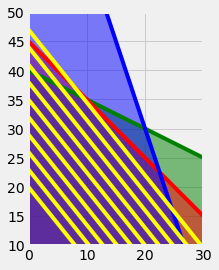

In [65]:
import numpy as np

graph = plt.subplot()
x = np.arange(0, 180, 1.0)
s_t_one = (-0.5 * x) + 40
s_t_two = (-1 * x) + 45
s_t_three = (-3 * x) + 90
graph.plot(x, s_t_one, color="green")
graph.fill_between(x, s_t_one, facecolor='green', alpha=0.5)
graph.plot(x, s_t_two, color="red")
graph.fill_between(x, s_t_two, facecolor='red', alpha=0.5)
graph.plot(x, s_t_three, color="blue")
graph.fill_between(x, s_t_three, facecolor='blue', alpha=0.5)

for i in range(20,50,3):
  p_coef = -1 * (5/4) * x + i
  graph.plot(x, p_coef, color="yellow")

graph.set_xlim([0, 30])
graph.set_ylim([10, 50])
graph.set_aspect('equal')
plt.show()

さて、このようにすると案外同じ位置にあるように見える交点でも違うことがわかったね。現時点で赤と緑の交点に近いが、赤と青の交点には遠い。つまりこれらの領域が最大値を取るのは「赤と青の交点」ということになる。実際の交点を計算してみよう

$$
4x_1 + 4x_2 = 180...① \\
3x_1 + x_2 = 90...② \\
\\
これら2つの直線の交点は
$$

#### 代入法による解法
係数１の項が存在するので加減法よりこちらの方が速い
$$
①より　\\
x_2 = -3x_1 + 90 \\
これを①に代入し　\\
4x_1 + 4(-3x_1 + 90) = 180となる \\
4x_1 + -12x_1 + 360 = 180 \\
8x_1 = 180
x_1 = 22.5  \\
この式を①、②どちらかに代入すればx_2が求まる \\
②に代入すると \\
3 × 22.5 + x_2 = 90 \\
x_2 = 22.5
$$

$\therefore 製品1,2をそれぞれ22.5トンずつ生産すれば、利益は最大の202.5万円となる$